In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df.shape

(288, 3)

In [3]:
df = df[df.Borough != 'Not assigned']
df.shape

(211, 3)

In [4]:
df.loc[df.Neighbourhood == 'Not assigned', 'Neighbourhood'] = df.Borough
df.shape

(211, 3)

In [5]:
df = df.groupby(['Postcode', 'Borough']).Neighbourhood.apply(', '.join).reset_index()
df.shape

(103, 3)

In [6]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [0]:
!wget https://cocl.us/Geospatial_data --quiet

In [8]:
df = pd.merge(df, pd.read_csv('Geospatial_data'), left_on='Postcode', right_on='Postal Code').drop('Postal Code', axis=1)
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


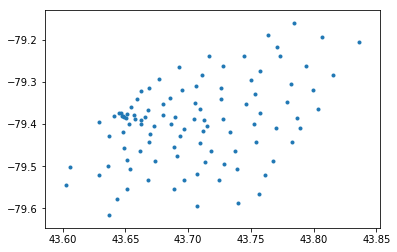

In [9]:
plt.scatter(df.Latitude, df.Longitude, marker='.')

In [10]:
k_means = KMeans(init = "k-means++", n_clusters = 16, n_init = 12)
k_means.fit(df[['Latitude', 'Longitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

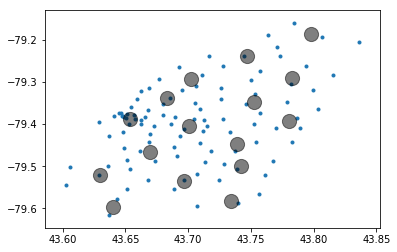

In [11]:
plt.scatter(df.Latitude, df.Longitude, marker='.')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='black', s=200, alpha=0.5);

In [0]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [13]:
map = folium.Map(location=[df.Latitude.mean(), df.Longitude.mean()], zoom_start=12)
for lat, lng in zip(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1]):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map)
map.save('toronto.html')
map